<a href="https://colab.research.google.com/github/pachterlab/GVP_2023/blob/main/gg230707_delays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy


In [30]:
tau=1 #residence time
gamma = 2
T = 3
nT = 100
t = np.linspace(0,T,nT)
b = 3
k = 0.6

In [32]:
nC = 5000
X = np.zeros((nT,nC,2))
for c_ in range(nC):
    arrivals_x1_num = np.random.poisson(T*k)
    arrival_times_x1 =  np.random.uniform(0,T,arrivals_x1_num)
    arrival_time_storage_1 = []
    exit_time_storage_1 = []
    for arr in range(arrivals_x1_num):
        bs = np.random.geometric(1/(1+b))-1
        if bs>0:
            arrival_time_storage_1 += [arrival_times_x1[arr]]*bs
            exit_time_storage_1 += [arrival_times_x1[arr] + tau]*bs
    arrival_time_storage_1 = np.asarray(arrival_time_storage_1)
    exit_time_storage_1 = np.asarray(exit_time_storage_1)
    arrival_time_storage_2 = np.copy(exit_time_storage_1)

    mat_lifetimes = np.random.exponential(1/gamma,arrival_time_storage_2.shape)
    exit_time_storage_2 = arrival_time_storage_2 + mat_lifetimes

    for tind,t_ in enumerate(t):
        extant_at_t_1 = (((exit_time_storage_1)>t_)&(arrival_time_storage_1<=t_)).sum()
        extant_at_t_2 = (((exit_time_storage_2)>t_)&(arrival_time_storage_2<=t_)).sum()
        X[tind,c_,0] = extant_at_t_1
        X[tind,c_,1] = extant_at_t_2


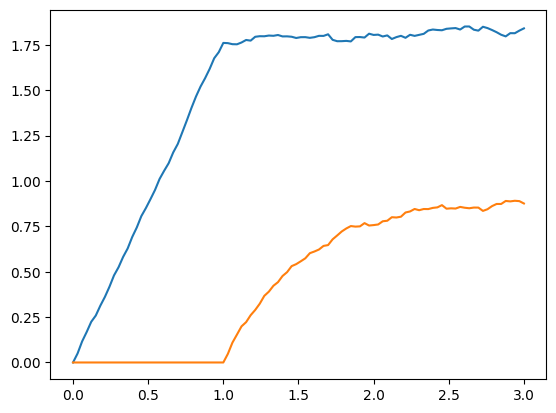

In [33]:
plt.plot(t,X.mean(1))

In [36]:
X.shape

(100, 5000, 2)

In [37]:
X_ = X[-1,:,:]

In [39]:
X_.mean(0)

array([1.8414, 0.8762])

In [41]:
X_.var(0)

array([13.05664604,  3.65487356])

In [43]:
np.corrcoef(X_.T)

array([[ 1.        , -0.00232118],
       [-0.00232118,  1.        ]])